# Predicting Diabetes (From pluralsight course)

## Import Libraries:

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## PREPARING MODEL:

### Load and review data:

In [17]:
dframe = pd.read_csv("./data/pima-data.csv")

In [18]:

dframe.shape #display (num of rows, num of columns)


(768, 10)

In [19]:
dframe.head() #get first 5 rows

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


### Check for null values:

In [20]:
dframe.isnull().values.any()

False

### Check for correlated values:

In [21]:
def visualise_correlations(dframe, size = 11):
    '''
    Display graphical correlations matrix for each pair of columns in data frame.
    Key:
        White - heavy correlation
        Black - without correlation
    '''
    correlations = dframe.corr('spearman', 10)
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(correlations, cmap=plt.cm.gray)
    plt.xticks(range(len(correlations.columns)), correlations.columns)
    plt.yticks(range(len(correlations.columns)), correlations.columns)

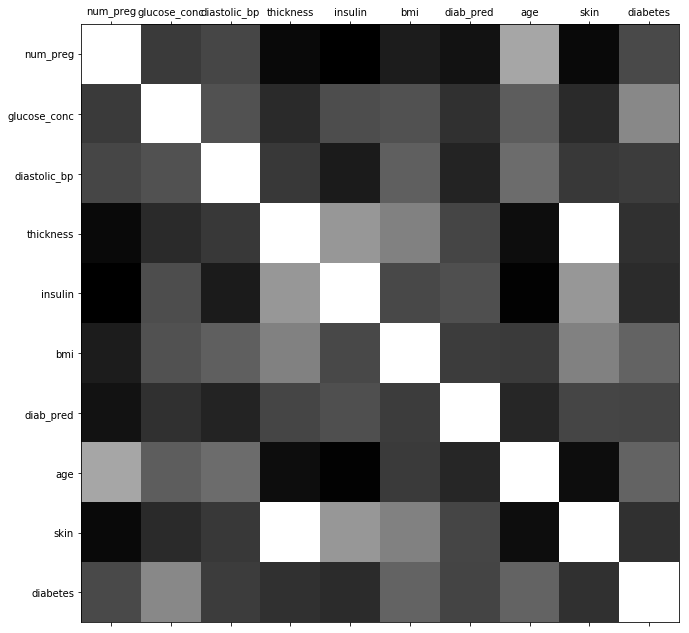

In [22]:
visualise_correlations(dframe)

In [23]:
dframe.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [24]:
dframe.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [25]:
del dframe['skin']

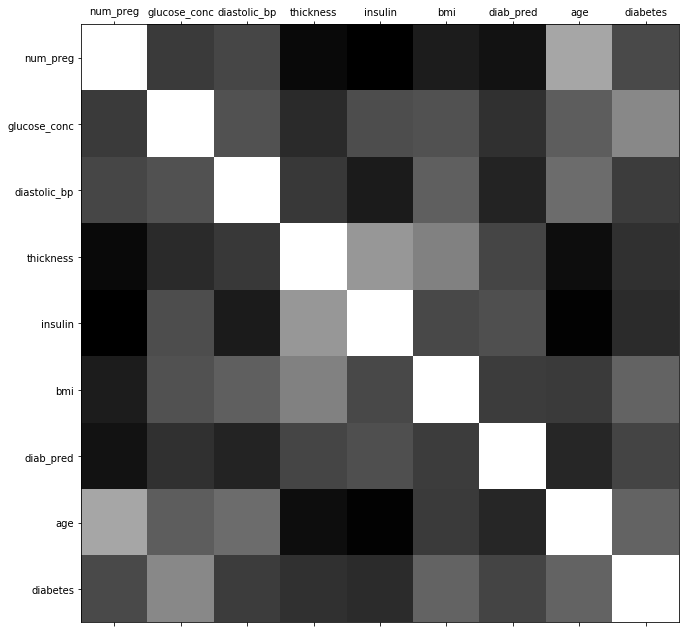

In [26]:
visualise_correlations(dframe)

### Checks data types:


In [27]:
dframe.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


Change True to 1 and False to 0:


In [28]:
diabetes_map_dictionary = {True : 1, False : 0}

In [29]:
dframe['diabetes'] = dframe['diabetes'].map(diabetes_map_dictionary)

In [30]:
dframe.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Checks diabetes(True/False) ratio:

In [31]:
num_true = len(dframe.loc[dframe['diabetes'] == 1])
num_false = len(dframe.loc[dframe['diabetes'] == 0])

In [32]:
print(num_true/num_false)
print("Number of true cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true + num_false))*100))
print("Number of false cases: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true + num_false))*100))

0.536
Number of true cases:  268 (34.90%)
Number of false cases: 500 (65.10%)


## TRAINING MODEL:

### Splitting the data:
70% for training and 30% for testing

In [33]:
from sklearn.cross_validation import train_test_split

In [34]:
feature_column_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_column_name = ['diabetes']

In [35]:
df_features = dframe[feature_column_names].values
df_predicted = dframe[predicted_column_name].values

split_test_size = 0.30

df_features_train, df_features_test, df_predicted_train, df_predicted_test = train_test_split(df_features,
                                                                                              df_predicted, 
                                                                                              test_size = split_test_size, 
                                                                                              random_state = 42)

#### Veryfing that prediction value was split correctly:

In [49]:
print("Orginal True: {0}".format(len(dframe.loc[dframe['diabetes'] == 1])))
print("Orginal False: {0}".format(len(dframe.loc[dframe['diabetes'] == 0])))

print("Training True: {0}".format(len(df_predicted_train[df_predicted_train[:] == 1])))
print("Training False: {0}".format(len(df_predicted_train[df_predicted_train[:] == 0])))

print("Test True: {0}".format(len(df_predicted_test[df_predicted_test[:] == 1])))
print("Test False: {0}".format(len(df_predicted_test[df_predicted_test[:] == 0])))

Orginal True: 268
Orginal False: 500
Training True: 188
Training False: 349
Test True: 80
Test False: 151


### Post-split data preparation:

#### Hidden missing values:

In [56]:
dframe.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Are cell with zero-values possible?
How many rows has zero-values?

In [60]:
print("# rows in dataframe: {0}".format(len(dframe)))
print("# rows with zero -glucose_conc-: {0}".format(len(dframe.loc[dframe['glucose_conc'] == 0])))
print("# rows with zero -diastolic_bp-: {0}".format(len(dframe.loc[dframe['diastolic_bp'] == 0])))
print("# rows with zero -thickness-: {0}".format(len(dframe.loc[dframe['thickness'] == 0])))
print("# rows with zero -insulin-: {0}".format(len(dframe.loc[dframe['insulin'] == 0])))
print("# rows with zero -bmi-: {0}".format(len(dframe.loc[dframe['bmi'] == 0])))
print("# rows with zero -diab_pred-: {0}".format(len(dframe.loc[dframe['diab_pred'] == 0])))
print("# rows with zero -age-: {0}".format(len(dframe.loc[dframe['age'] == 0])))


# rows in dataframe: 768
# rows with zero -glucose_conc-: 5
# rows with zero -diastolic_bp-: 35
# rows with zero -thickness-: 227
# rows with zero -insulin-: 374
# rows with zero -bmi-: 11
# rows with zero -diab_pred-: 0
# rows with zero -age-: 0


#### Impute with the mean:

In [61]:
from sklearn.preprocessing import Imputer

In [64]:
when_zero_filler = Imputer(missing_values=0, strategy='mean', axis=0) #axis=0 mean column

In [65]:
df_features_train = when_zero_filler.fit_transform(df_features_train)
df_features_test = when_zero_filler.fit_transform(df_features_test)

### Training Initial Algorithm - Naive Bayes:

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
nb_model = GaussianNB()

In [70]:
nb_model.fit(df_features_train, df_predicted_train.ravel())

GaussianNB(priors=None)